In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t
import os


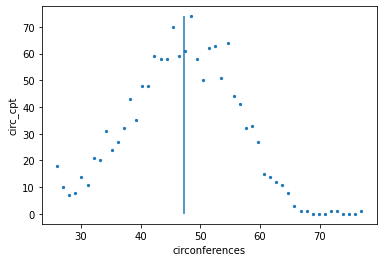

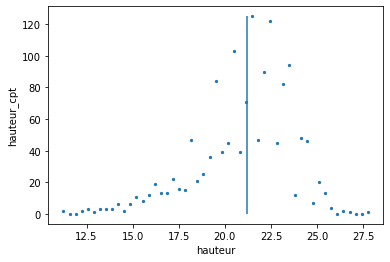

In [2]:
# lecture fichier Eucalypcus
file = open(os.getcwd()+"\\Eucaliptus.csv")
csvreader = csv.reader(file)
next(csvreader)

circs = np.empty([0])
hauteurs = np.empty([0])

for row in csvreader:
    c = float(row[1])
    h = float(row[2])
    circs = np.append(circs,c)
    hauteurs = np.append(hauteurs,h)

max_c = np.amax(circs)
min_c = np.amin(circs)
max_h = np.amax(hauteurs)
min_h = np.amin(hauteurs)

pas = 50

# circs
circs_cpt = np.zeros(pas+1)
diff_c = max_c - min_c
axis_x = min_c + np.arange(0,pas+1)*diff_c/pas
for c in circs:
    index = int((c - min_c)*pas/diff_c)
    circs_cpt[index] += 1

plt.scatter(axis_x, circs_cpt,s=5)
plt.vlines(x = np.mean(circs), ymin = 0, ymax = np.amax(circs_cpt)) 
plt.ylabel("circ_cpt");
plt.xlabel("circonferences")
plt.show()


# hauteurs
hauteurs_cpt = np.zeros(pas+1)
diff_h = max_h - min_h
axis_h = min_h + np.arange(0,pas+1)*diff_h/pas
for h in hauteurs:
    index = int((h - min_h)*pas/diff_h)
    hauteurs_cpt[index] += 1

plt.scatter(axis_h, hauteurs_cpt,s=5)
plt.vlines(x = np.mean(hauteurs), ymin = 0, ymax = np.amax(hauteurs_cpt)) 
plt.ylabel("hauteur_cpt");
plt.xlabel("hauteur")
plt.show()


In [3]:
# lecture fichier Eucalypcus
file = open(os.getcwd()+"\\Eucaliptus.csv")
csvreader = csv.reader(file)
next(csvreader)

xi = 0.0
yi = 0.0
xi2 = 0.0
xiyi= 0.0
circs = np.empty([0])
hauteurs = np.empty([0])

for row in csvreader:
    c = float(row[1])
    h = float(row[2])
    xi += c
    yi += h
    xiyi += c*h
    xi2 += c**2
    circs = np.append(circs,c)
    hauteurs = np.append(hauteurs,h)

file.close()


beta1: 9.037475668452768, beta2: 0.257137855007109


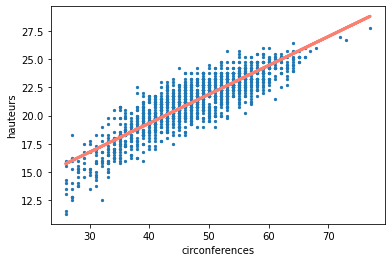

Moyenne de espilon: 5.071753607244942e-16


In [4]:
# Question 3
n = circs.size
beta1 = (xi2*yi - xi*xiyi)/(n*xi2-xi**2)
beta2 = (n*xiyi - xi*yi)/(n*xi2-xi**2)
print(f"beta1: {beta1}, beta2: {beta2}")

y = beta1+beta2*circs

plt.scatter(circs, hauteurs,s=5)
plt.plot(circs, y, color='salmon', linewidth=3)
plt.xlabel("circonferences");
plt.ylabel("hauteurs")
plt.show()

print(f"Moyenne de espilon: {np.sum(y-hauteurs)/n}")


In [5]:
#Q7
# lecture fichier Eucalypcus
file = open(os.getcwd()+"\\Eucaliptus.csv")
csvreader = csv.reader(file)
next(csvreader)

circs = np.empty([0,3], float)
circs1 = np.empty([0,2], float)
circs2 = np.empty([0,5], float)
hauteurs = np.empty([0])

for row in csvreader:
    c = float(row[1])
    h = float(row[2])
    circs  = np.append(circs,[(1.0,c,np.sqrt(c))],axis=0)     # regression multiple ordre 2
    circs1 = np.append(circs1,[(1.0,c)],axis=0)               # regression simple
    circs2  = np.append(circs2,[(1.0,c,c*c,c*c*c, c*c*c*c)],axis=0) #regression multiple ordre 5
    hauteurs = np.append(hauteurs,h)

file.close()


In [6]:
def calcule_beta(X, Y):
    XT = X.transpose()
    A = np.matmul(XT,X)
    A_inv = np.linalg.inv(A)
    B = np.matmul(XT,Y)
    beta = np.matmul(A_inv,B)
    return beta

print(f"Beta: {calcule_beta(circs, hauteurs)}")
print(f"Beta: {calcule_beta(circs1, hauteurs)}") # meme resultats que la regression lineaire simple 

Beta: [-24.35200327  -0.48294547   9.98688814]
Beta: [9.03747567 0.25713786]


Beta multiple: [-24.35200327  -0.48294547   9.98688814]
Beta simple: [9.03747567 0.25713786]


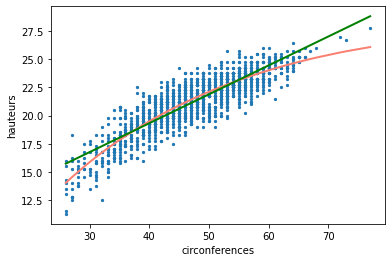

Moyenne de espilon: -3.603610217941441e-11
risque quadratique: 19.492804231375466
Moyenne de espilon: 1.0692449957862278e-13
risque quadratique: 19.32298986873724


In [7]:
# Question 7
beta = calcule_beta(circs, hauteurs)
# Tri par hauteurs pour tracer proprement la courbe
circs_sort = circs[circs[:, 1].argsort()]
y = beta[0]+beta[1]*circs_sort[:,[1]]+beta[2]*circs_sort[:,[2]]

beta1 = calcule_beta(circs1, hauteurs)
# Tri par hauteurs pour tracer proprement la courbe
circs1_sort = circs1[circs1[:, 1].argsort()]
y1 = beta1[0]+beta1[1]*circs1_sort[:,[1]]

print(f"Beta multiple: {beta}")
print(f"Beta simple: {beta1}") # meme resultats que la regression lineaire simple 

plt.scatter(circs[:,[1]], hauteurs,s=5)
plt.plot(circs_sort[:,[1]], y, color='salmon', linewidth=2)   # regression lineaire multiple
plt.plot(circs1_sort[:,[1]], y1, color='green', linewidth=2)  # regression lineaire simple
plt.xlabel("circonferences")
plt.ylabel("hauteurs")
plt.show()

#n = hauteurs.size
res = 0
for i in range(hauteurs.size):
    h = beta[0] + beta[1]*circs[i,1] + beta[2]*circs[i,2]
    res = res + np.power(hauteurs[i] - h,2) 
res1 = 0
for i in range(hauteurs.size):
    h1 = beta1[0] + beta1[1]*circs1[i,1]
    res1 = res1 + np.power(hauteurs[i] - h1,2) 

print(f"Moyenne de espilon: {(np.sum(y)-np.sum(hauteurs))/n}")
print(f"risque quadratique: {h}")
print(f"Moyenne de espilon: {(np.sum(y1)-np.sum(hauteurs))/n}")
print(f"risque quadratique: {h1}")


In [8]:
# Question 10
import scipy.stats as st

# lecture fichier Eucalypcus
file = open(os.getcwd()+"\\Eucaliptus.csv")
csvreader = csv.reader(file)
next(csvreader)

circs = np.empty([0,3], float)
circs1 = np.empty([0,2], float)
hauteurs = np.empty([0])

for row in csvreader:
    c = float(row[1])
    h = float(row[2])
    circs  = np.append(circs,[(1.0,c,np.sqrt(c))],axis=0)     # regression multiple ordre 2
    circs1 = np.append(circs1,[(1.0,c)],axis=0)               # regression simple
    hauteurs = np.append(hauteurs,h)

file.close()


In [9]:
def calcul_sigma(X, Y, beta):
    res = 0
    for i in range(Y.size):
        h = beta[0] + beta[1]*X[i,1] + beta[2]*X[i,2]
        res = res + np.power(Y[i] - h,2) 
    return np.sqrt(res/(Y.size+1-3))

def calcul_m3(X):
    XT = X.transpose()
    A = np.matmul(XT,X)
    A_inv = np.linalg.inv(A)
    return np.sqrt(A_inv[2,2])

In [10]:
beta = calcule_beta(circs, hauteurs)
sigma = calcul_sigma(circs, hauteurs, beta)
m3 = calcul_m3(circs)
T = beta[2] / (m3*sigma)

print(f"T : {T}")

conf = .99
ppf = st.chi2.ppf(q = (1-conf)/2, df = hauteurs.size-3)
print(f"ppf : {ppf}")



T : 9.986888137369533 0.686829748802427 1.1357280297141148 12.802852542888674
ppf : 1292.1980833934238


In [11]:
def calcul_sigma2_simple(X, Y, beta):
    res = 0
    for i in range(Y.size):
        h = beta[0] + beta[1]*X[i,1]
        res = res + np.power(Y[i] - h,2) 
    return res/(Y.size-2)


def calcul_sxx(X):
    mean = np.mean(X)
    res = 0
    for i in range(X.size):
        res = res + np.power(X[i] - mean,2) 
    return res


In [12]:
#Question 11
import scipy.stats

file = open(os.getcwd()+"\\Eucaliptus.csv")
csvreader = csv.reader(file)
next(csvreader)

circs1 = np.empty([0,2], float)
hauteurs = np.empty([0])
circonfs = np.empty([0])

for row in csvreader:
    c = float(row[1])
    h = float(row[2])
    circs1   = np.append(circs1,[(1.0,c)],axis=0)               # regression simple
    circonfs = np.append(circonfs,c)
    hauteurs = np.append(hauteurs,h)

file.close()

n = circonfs.size
df = n -2
alpha = 0.05

beta = calcule_beta(circs1, hauteurs)
print(f"{beta}")

sigma2 = calcul_sigma2_simple(circs1, hauteurs, beta)
#print(f"{sigma2}")
tr = scipy.stats.t.ppf(alpha/2,df)
#print(f"{tr}")
sxx = calcul_sxx(circonfs)
#print(f"sxx: {sxx}")

conf_b0 = tr*np.sqrt(sigma2*((1/n+np.power(np.mean(circs),2)/sxx)))
print(f"confiance b0: {conf_b0}, {beta[0]-conf_b0}, {beta[0]+conf_b0}")

conf_b1 = tr*np.sqrt(sigma2/sxx)
print(f"confiance b1: {conf_b1}, {beta[1]-conf_b1}, {beta[1]+conf_b1}")


[9.03747567 0.25713786]
confiance b0: -0.14857451813593908, 9.186050186588824, 8.888901150316945
confiance b1: -0.007332356088614205, 0.26447021109572305, 0.24980549891849463
